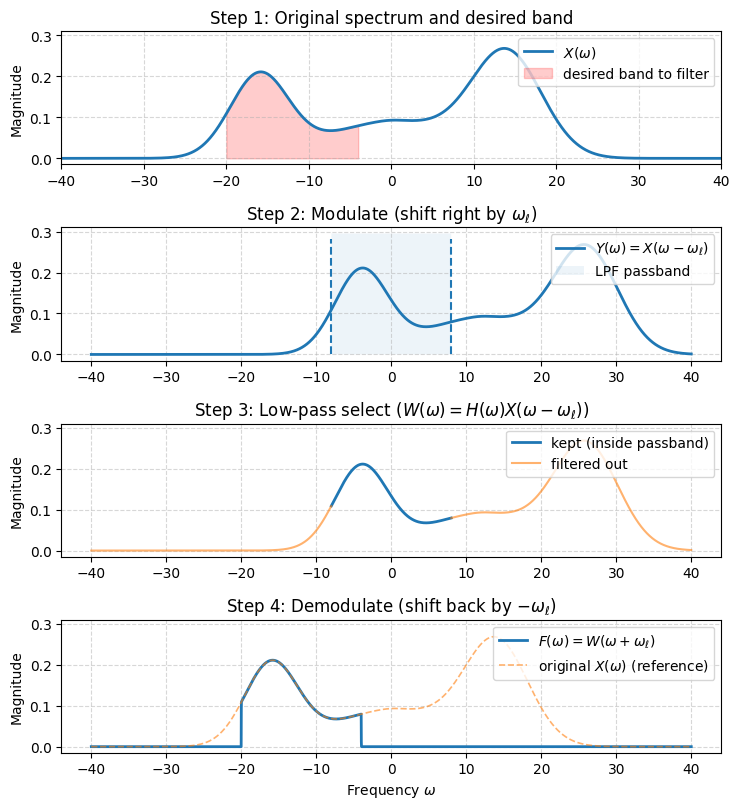

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# -------- Parameters --------
w = np.linspace(-40, 40, 4000)   # frequency axis
w_l = 12.0                       # modulation (ω_l)
w_0 = 8.0                        # LPF cutoff (ω_0)

# User's spectrum (random-ish broadband)
X = (
    0.09  * np.exp(-(w/11)**2)
  + 0.25  * np.exp(-((w-14)/6)**2)
  + 0.20  * np.exp(-((w+16)/5)**2)
  + 0.002 * np.exp(-(w/2.0)**2)
)

def shift_spectrum(X_vals, shift, w_axis):
    """Return X(w - shift)."""
    return np.interp(w_axis - shift, w_axis, X_vals, left=0.0, right=0.0)

# Stages
Xw = X.copy()
Yw = shift_spectrum(Xw, w_l, w)           # Step 2: shift right by ω_l
H  = (np.abs(w) <= w_0).astype(float)     # ideal LPF
Ww = H * Yw                               # Step 3: keep only passband
Fw = shift_spectrum(Ww, -w_l, w)          # Step 4: shift back by −ω_l

# Desired band (on the ORIGINAL X): [ω_l − ω_0, ω_l + ω_0]
band_lo = w_l - w_0
band_hi = w_l + w_0

# -------- Plotting --------
fig, axes = plt.subplots(4, 1, figsize=(7.5, 8.2), sharey=True)

# Step 1: Original X(ω) + desired band highlighted
ax = axes[0]
ax.plot(w, Xw, label=r'$X(\omega)$', linewidth=2)
ax.fill_between(w, 0, Xw, where=(((w >= -band_hi) & (w <= -band_lo))),
                alpha=0.20, color='red', label='desired band to filter')
ax.set_title('Step 1: Original spectrum and desired band')
ax.set_ylabel(r'Magnitude')
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(loc='upper right')
ax.set_xlim(w[0], w[-1])

# Step 2: Modulate (shift by ω_l) → Y(ω) = X(ω − ω_l)
ax = axes[1]
ax.plot(w, Yw, linewidth=2, label=r'$Y(\omega)=X(\omega-\omega_\ell)$')
# Show LPF passband
ax.fill_between(w, 0, Yw.max()*1.1, where=(np.abs(w) <= w_0),
                alpha=0.08, step='pre', label='LPF passband')
ax.vlines([-w_0, w_0], 0, Yw.max()*1.05, linestyles='dashed')
ax.set_title('Step 2: Modulate (shift right by $\\omega_\\ell$)')
ax.set_ylabel(r'Magnitude')
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(loc='upper right')

# Step 3: Low-pass select → W(ω) = H(ω) X(ω − ω_l)
ax = axes[2]
# Show what gets filtered out vs kept
kept = np.where(np.abs(w) <= w_0, Yw, np.nan)
out  = np.where(np.abs(w) >  w_0, Yw, np.nan)
ax.plot(w, kept, linewidth=2, label='kept (inside passband)')
ax.plot(w, out,  linewidth=1.5, alpha=0.6, label='filtered out')
ax.set_title('Step 3: Low-pass select ($W(\\omega)=H(\\omega)X(\\omega-\\omega_\\ell)$)')
ax.set_ylabel(r'Magnitude')
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(loc='upper right')

# Step 4: Demodulate back → F(ω) = W(ω + ω_l)
ax = axes[3]
ax.plot(w, Fw, linewidth=2, label=r'$F(\omega)=W(\omega+\omega_\ell)$')
# Overlay the original X(ω) faint dashed
ax.plot(w, Xw, linestyle='--', linewidth=1.2, alpha=0.6, label=r'original $X(\omega)$ (reference)')
ax.set_title('Step 4: Demodulate (shift back by $-\\omega_\\ell$)')
ax.set_xlabel(r'Frequency $\omega$')
ax.set_ylabel(r'Magnitude')
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(loc='upper right')

plt.tight_layout()
plt.savefig('frequency_selective_filtering.png')
plt.show()
